# Imports

In [1]:
using DataFrames
using CSV
using MLJ
using Plots
using StatsBase

include("../../lib.jl")

ENV["LINES"]=30;

# Dataset

In [2]:
df = CSV.read("data.csv")

,Class,Instance,Nucleotide_Sequence
,String,String,String
1,EI,ATRINS-DONOR-521,CCAGCTGCATCACAGGAGGCCAGCGAGCAGGTCTGTTCCAAGGGCCTTCGAGCCAGTCTG
2,EI,ATRINS-DONOR-905,AGACCCGCCGGGAGGCGGAGGACCTGCAGGGTGAGCCCCACCGCCCCTCCGTGCCCCCGC
3,EI,BABAPOE-DONOR-30,GAGGTGAAGGACGTCCTTCCCCAGGAGCCGGTGAGAAGCGCAGTCGGGGGCACGGGGATG
4,EI,BABAPOE-DONOR-867,GGGCTGCGTTGCTGGTCACATTCCTGGCAGGTATGGGGCGGGGCTTGCTCGGTTTTCCCC
5,EI,BABAPOE-DONOR-2817,GCTCAGCCCCCAGGTCACCCAGGAACTGACGTGAGTGTCCCCATCCCGGCCCTTGACCCT
6,EI,CHPIGECA-DONOR-378,CAGACTGGGTGGACAACAAAACCTTCAGCGGTAAGAGAGGGCCAAGCTCAGAGACCACAG
7,EI,CHPIGECA-DONOR-903,CCTTTGAGGACAGCACCAAGAAGTGTGCAGGTACGTTCCCACCTGCCCTGGTGGCCGCCA
8,EI,CHPIGECA-DONOR-1313,CCCTCGTGCGGTCCACGACCAAGACCAGCGGTGAGCCACGGGCAGGCCGGGGTCGTGGGG
9,EI,GCRHBBA1-DONOR-1260,TGGCGACTACGGCGCGGAGGCCCTGGAGAGGTGAGGACCCTCCTGTCCCTGCTCCAGTCC


In [3]:
data = separate_bases(df)

,x1,x2,x3,x4,x5,x6,x7,x8,x9
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,67.0,67.0,65.0,71.0,67.0,84.0,71.0,67.0,65.0
2,65.0,71.0,65.0,67.0,67.0,67.0,71.0,67.0,67.0
3,71.0,65.0,71.0,71.0,84.0,71.0,65.0,65.0,71.0
4,71.0,71.0,71.0,67.0,84.0,71.0,67.0,71.0,84.0
5,71.0,67.0,84.0,67.0,65.0,71.0,67.0,67.0,67.0
6,67.0,65.0,71.0,65.0,67.0,84.0,71.0,71.0,71.0
7,67.0,67.0,84.0,84.0,84.0,71.0,65.0,71.0,71.0
8,67.0,67.0,67.0,84.0,67.0,71.0,84.0,71.0,67.0
9,84.0,71.0,71.0,67.0,71.0,65.0,67.0,84.0,65.0


In [4]:
data = hcat(df,data)

,Class,Instance,Nucleotide_Sequence
,String,String,String
1,EI,ATRINS-DONOR-521,CCAGCTGCATCACAGGAGGCCAGCGAGCAGGTCTGTTCCAAGGGCCTTCGAGCCAGTCTG
2,EI,ATRINS-DONOR-905,AGACCCGCCGGGAGGCGGAGGACCTGCAGGGTGAGCCCCACCGCCCCTCCGTGCCCCCGC
3,EI,BABAPOE-DONOR-30,GAGGTGAAGGACGTCCTTCCCCAGGAGCCGGTGAGAAGCGCAGTCGGGGGCACGGGGATG
4,EI,BABAPOE-DONOR-867,GGGCTGCGTTGCTGGTCACATTCCTGGCAGGTATGGGGCGGGGCTTGCTCGGTTTTCCCC
5,EI,BABAPOE-DONOR-2817,GCTCAGCCCCCAGGTCACCCAGGAACTGACGTGAGTGTCCCCATCCCGGCCCTTGACCCT
6,EI,CHPIGECA-DONOR-378,CAGACTGGGTGGACAACAAAACCTTCAGCGGTAAGAGAGGGCCAAGCTCAGAGACCACAG
7,EI,CHPIGECA-DONOR-903,CCTTTGAGGACAGCACCAAGAAGTGTGCAGGTACGTTCCCACCTGCCCTGGTGGCCGCCA
8,EI,CHPIGECA-DONOR-1313,CCCTCGTGCGGTCCACGACCAAGACCAGCGGTGAGCCACGGGCAGGCCGGGGTCGTGGGG
9,EI,GCRHBBA1-DONOR-1260,TGGCGACTACGGCGCGGAGGCCCTGGAGAGGTGAGGACCCTCCTGTCCCTGCTCCAGTCC


In [5]:
# data[:,3:5]

In [6]:
data = data[:, Not(2:3)]

,Class,x1,x2,x3,x4,x5,x6,x7,x8
,String,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,EI,67.0,67.0,65.0,71.0,67.0,84.0,71.0,67.0
2,EI,65.0,71.0,65.0,67.0,67.0,67.0,71.0,67.0
3,EI,71.0,65.0,71.0,71.0,84.0,71.0,65.0,65.0
4,EI,71.0,71.0,71.0,67.0,84.0,71.0,67.0,71.0
5,EI,71.0,67.0,84.0,67.0,65.0,71.0,67.0,67.0
6,EI,67.0,65.0,71.0,65.0,67.0,84.0,71.0,71.0
7,EI,67.0,67.0,84.0,84.0,84.0,71.0,65.0,71.0
8,EI,67.0,67.0,67.0,84.0,67.0,71.0,84.0,71.0
9,EI,84.0,71.0,71.0,67.0,71.0,65.0,67.0,84.0


Look at class labels to see if dataset is imbalanced

In [7]:
label_counts = countmap(data[:(Class)])

Dict{String,Int64} with 3 entries:
  "IE" => 768
  "EI" => 767
  "N"  => 1655

In [8]:
collect(label_counts[i] / size(data)[1] for i in keys(label_counts))

3-element Array{Float64,1}:
 0.24075235109717869
 0.24043887147335424
 0.5188087774294671

Get data ready for training

In [9]:
coerce!(data, :Class=>Multiclass)
schema(data)

┌─────────┬─────────────────────────────────┬───────────────┐
│ _.names │ _.types                         │ _.scitypes    │
├─────────┼─────────────────────────────────┼───────────────┤
│ Class   │ CategoricalValue{String,UInt32} │ Multiclass{3} │
│ x1      │ Float64                         │ Continuous    │
│ x2      │ Float64                         │ Continuous    │
│ x3      │ Float64                         │ Continuous    │
│ x4      │ Float64                         │ Continuous    │
│ x5      │ Float64                         │ Continuous    │
│ x6      │ Float64                         │ Continuous    │
│ x7      │ Float64                         │ Continuous    │
│ x8      │ Float64                         │ Continuous    │
│ x9      │ Float64                         │ Continuous    │
│ x10     │ Float64                         │ Continuous    │
│ x11     │ Float64                         │ Continuous    │
│ x12     │ Float64                         │ Continuous    │
│ x13   

In [10]:
y, X = unpack(data, ==(:Class), colname->true)

(CategoricalValue{String,UInt32}["EI", "EI", "EI", "EI", "EI", "EI", "EI", "EI", "EI", "EI"  …  "N", "N", "N", "N", "N", "N", "N", "N", "N", "N"], 3190×60 DataFrame. Omitted printing of 53 columns
│ Row  │ x1      │ x2      │ x3      │ x4      │ x5      │ x6      │ x7      │
│      │ Float64 │ Float64 │ Float64 │ Float64 │ Float64 │ Float64 │ Float64 │
├──────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┼─────────┤
│ 1    │ 67.0    │ 67.0    │ 65.0    │ 71.0    │ 67.0    │ 84.0    │ 71.0    │
│ 2    │ 65.0    │ 71.0    │ 65.0    │ 67.0    │ 67.0    │ 67.0    │ 71.0    │
│ 3    │ 71.0    │ 65.0    │ 71.0    │ 71.0    │ 84.0    │ 71.0    │ 65.0    │
│ 4    │ 71.0    │ 71.0    │ 71.0    │ 67.0    │ 84.0    │ 71.0    │ 67.0    │
│ 5    │ 71.0    │ 67.0    │ 84.0    │ 67.0    │ 65.0    │ 71.0    │ 67.0    │
│ 6    │ 67.0    │ 65.0    │ 71.0    │ 65.0    │ 67.0    │ 84.0    │ 71.0    │
│ 7    │ 67.0    │ 67.0    │ 84.0    │ 84.0    │ 84.0    │ 71.0    │ 65.0    │
│ 8    │ 67.0

Partition train and test data accoring to class labels

In [11]:
# data to use when trying to fit a single validation set
train, test = partition(eachindex(y), 0.8, shuffle=true, rng=113, stratify=values(data[:Class])) # gives 70:30 split

([1538, 582, 137, 1511, 1964, 2204, 2888, 2375, 2864, 1387  …  656, 625, 283, 1076, 2074, 743, 3177, 530, 592, 2916], [898, 2807, 2307, 2787, 1648, 1390, 3044, 2312, 586, 1612  …  2993, 729, 3006, 958, 2551, 1687, 2792, 2185, 1273, 1616])

In [12]:
train_counts = countmap(data[train,:Class])
collect(train_counts[i] / size(train)[1] for i in keys(train_counts))

3-element Array{Float64,1}:
 0.24059561128526646
 0.5188087774294671
 0.24059561128526646

In [13]:
test_counts = countmap(data[test,:Class])
collect(test_counts[i] / size(test)[1] for i in keys(test_counts))

3-element Array{Float64,1}:
 0.2413793103448276
 0.5188087774294671
 0.23981191222570533

# Five Learning Algorithms

* Decision trees with some form of pruning
* Neural networks
* Boosting
* Support Vector Machines
* k-nearest neighbors


##### Testing
* Implement the algorithms
* Design two *interesting* classification problems. For the purposes of this assignment, a classification problem is just a set of training examples and a set of test examples.

In [14]:
models(matching(X,y))

42-element Array{NamedTuple{(:name, :package_name, :is_supervised, :docstring, :hyperparameter_ranges, :hyperparameter_types, :hyperparameters, :implemented_methods, :is_pure_julia, :is_wrapper, :load_path, :package_license, :package_url, :package_uuid, :prediction_type, :supports_online, :supports_weights, :input_scitype, :target_scitype, :output_scitype),T} where T<:Tuple,1}:
 (name = AdaBoostClassifier, package_name = ScikitLearn, ... )
 (name = AdaBoostStumpClassifier, package_name = DecisionTree, ... )
 (name = BaggingClassifier, package_name = ScikitLearn, ... )
 (name = BayesianLDA, package_name = MultivariateStats, ... )
 (name = BayesianLDA, package_name = ScikitLearn, ... )
 (name = BayesianQDA, package_name = ScikitLearn, ... )
 (name = BayesianSubspaceLDA, package_name = MultivariateStats, ... )
 (name = ConstantClassifier, package_name = MLJModels, ... )
 (name = DecisionTreeClassifier, package_name = DecisionTree, ... )
 (name = DeterministicConstantClassifier, package_na

In [15]:
@load AdaBoostClassifier verbosity=2

import MLJScikitLearnInterface 

┌ Info: Loading into module "Main": 
└ @ MLJModels /home/andrew/.julia/packages/MLJModels/mUBFt/src/loading.jl:70
┌ Info: Precompiling MLJScikitLearnInterface [5ae90465-5518-4432-b9d2-8a1def2f0cab]
└ @ Base loading.jl:1278


✔
import MLJScikitLearnInterface ✔


AdaBoostClassifier(
    base_estimator = nothing,
    n_estimators = 50,
    learning_rate = 1.0,
    algorithm = "SAMME.R",
    random_state = nothing) @701

### Boosting
* Implement or steal a boosted version of your decision trees. 
* As before, you will want to use some form of pruning, but presumably because you're using boosting you can afford to be much more aggressive about your pruning.

**Chooses the hardest examples** talk about in write-up

In [16]:
boost_model = AdaBoostClassifier()

AdaBoostClassifier(
    base_estimator = nothing,
    n_estimators = 50,
    learning_rate = 1.0,
    algorithm = "SAMME.R",
    random_state = nothing) @465

In [17]:
boost_mach = machine(boost_model, X, y)

Machine{AdaBoostClassifier} @966 trained 0 times.
  args: 
    1:	Source @555 ⏎ `Table{AbstractArray{Continuous,1}}`
    2:	Source @268 ⏎ `AbstractArray{Multiclass{3},1}`


In [18]:
fit!(boost_mach, rows=train, verbosity=2)

┌ Info: Training Machine{AdaBoostClassifier} @966.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:319


Machine{AdaBoostClassifier} @966 trained 1 time.
  args: 
    1:	Source @555 ⏎ `Table{AbstractArray{Continuous,1}}`
    2:	Source @268 ⏎ `AbstractArray{Multiclass{3},1}`


In [19]:
boost_acc = evaluate!(boost_mach, resampling=CV(shuffle=true), measure=[cross_entropy, acc], 
                      verbosity=1, check_measure=false)

Evaluating over 6 folds: 100%[=========================] Time: 0:00:05


┌───────────────┬───────────────┬───────────────────────────────────────────┐
│ _.measure     │ _.measurement │ _.per_fold                                │
├───────────────┼───────────────┼───────────────────────────────────────────┤
│ cross_entropy │ 0.883         │ [0.816, 0.86, 0.905, 0.903, 0.911, 0.899] │
│ acc           │ 0.937         │ [0.934, 0.93, 0.942, 0.936, 0.938, 0.944] │
└───────────────┴───────────────┴───────────────────────────────────────────┘
_.per_observation = [[[0.681, 0.876, ..., 0.643], [0.721, 0.768, ..., 0.76], [0.886, 0.867, ..., 0.995], [0.983, 1.03, ..., 0.94], [1.06, 0.992, ..., 0.959], [0.996, 0.931, ..., 1.12]], missing]
_.fitted_params_per_fold = [ … ]
_.report_per_fold = [ … ]


In [20]:
# evaluate!(boost_mach, resampling=CV(shuffle=true), measure=[tnr,tpr,fnr,fpr], verbosity=1, operation=predict_mode)

In [21]:
fitted_params(boost_mach);

### GridSearch 
number of estimators vs learning rate

In [22]:
param1 = :learning_rate
param2 = :n_estimators

r1 = range(boost_model, param1, lower=0.001, upper=10, scale=:log10)
r2 = range(boost_model, param2, lower=1, upper=1000, scale=:log10)

MLJBase.NumericRange(Int64, :n_estimators, ... )

In [23]:
self_tuning_boost_model = TunedModel(model=boost_model,
                                    tuning=Grid(),
                                    resampling=CV(), 
                                    measure=cross_entropy,
                                    acceleration=CPUThreads(),
                                    range=[r1, r2])

ProbabilisticTunedModel(
    model = AdaBoostClassifier(
            base_estimator = nothing,
            n_estimators = 50,
            learning_rate = 1.0,
            algorithm = "SAMME.R",
            random_state = nothing),
    tuning = Grid(
            goal = nothing,
            resolution = 10,
            shuffle = true,
            rng = Random._GLOBAL_RNG()),
    resampling = CV(
            nfolds = 6,
            shuffle = false,
            rng = Random._GLOBAL_RNG()),
    measure = cross_entropy(
            eps = 2.220446049250313e-16),
    weights = nothing,
    operation = MLJModelInterface.predict,
    range = MLJBase.NumericRange{T,MLJBase.Bounded,Symbol} where T[NumericRange{Float64,…} @987, NumericRange{Int64,…} @308],
    train_best = true,
    repeats = 1,
    n = nothing,
    acceleration = CPUThreads{Int64}(1),
    acceleration_resampling = CPU1{Nothing}(nothing),
    check_measure = true) @015

In [24]:
self_tuning_boost = machine(self_tuning_boost_model, X, y)

Machine{ProbabilisticTunedModel{Grid,…}} @471 trained 0 times.
  args: 
    1:	Source @806 ⏎ `Table{AbstractArray{Continuous,1}}`
    2:	Source @918 ⏎ `AbstractArray{Multiclass{3},1}`


In [25]:
z = fit!(self_tuning_boost, rows=train)

┌ Info: Training Machine{ProbabilisticTunedModel{Grid,…}} @471.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:319
┌ Info: Attempting to evaluate 100 models.
└ @ MLJTuning /home/andrew/.julia/packages/MLJTuning/Bbgvk/src/tuned_models.jl:494
Evaluating over 100 metamodels: 100%[=========================] Time: 0:05:52


Machine{ProbabilisticTunedModel{Grid,…}} @471 trained 1 time.
  args: 
    1:	Source @806 ⏎ `Table{AbstractArray{Continuous,1}}`
    2:	Source @918 ⏎ `AbstractArray{Multiclass{3},1}`


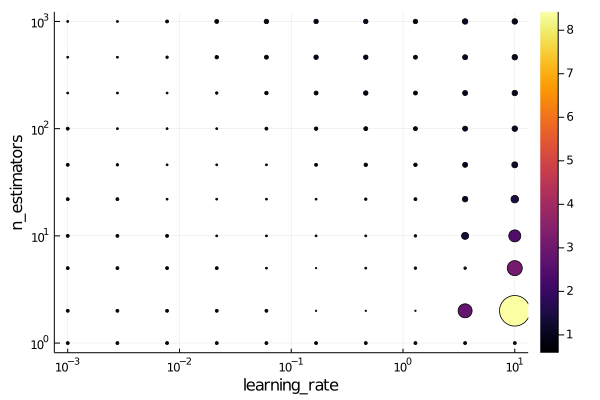

In [26]:
plot(self_tuning_boost)

In [27]:
best = fitted_params(self_tuning_boost)
best.best_model

AdaBoostClassifier(
    base_estimator = nothing,
    n_estimators = 2,
    learning_rate = 1.2915496650148839,
    algorithm = "SAMME.R",
    random_state = nothing) @400

In [28]:
best_loss = round(z.report.best_result.measurement[1],digits=5)

0.59064

In [29]:
best_n = best.best_model.n_estimators
best_lr = best.best_model.learning_rate

1.2915496650148839

In [30]:
fn = "Figures/LearningCurve_Boost_nestimators:$(best_n)_lr:$(best_lr)_loss:$(best_loss)"
png(replace(fn,'.' => ','))

### Learning Curves

In [31]:
data_schedule, training_losses, valid_losses = learn_curve(best.best_model, X[train,:], y[train], acc)

(d, train_metric, valid_metric) = (10, 1.0, 0.46078431372549017)
(d, train_metric, valid_metric) = (15, 0.8, 0.37254901960784315)
(d, train_metric, valid_metric) = (20, 0.8, 0.4823529411764706)
(d, train_metric, valid_metric) = (25, 0.72, 0.403921568627451)
(d, train_metric, valid_metric) = (30, 0.8, 0.5980392156862745)
(d, train_metric, valid_metric) = (35, 0.7428571428571429, 0.5078431372549019)
(d, train_metric, valid_metric) = (40, 0.55, 0.4294117647058823)
(d, train_metric, valid_metric) = (45, 0.5555555555555556, 0.4294117647058823)
(d, train_metric, valid_metric) = (50, 0.48, 0.396078431372549)
(d, train_metric, valid_metric) = (55, 0.6181818181818182, 0.4392156862745098)
(d, train_metric, valid_metric) = (60, 0.6166666666666667, 0.4392156862745098)
(d, train_metric, valid_metric) = (65, 0.676923076923077, 0.6862745098039216)
(d, train_metric, valid_metric) = (70, 0.7428571428571429, 0.6725490196078432)
(d, train_metric, valid_metric) = (75, 0.7066666666666667, 0.686274509803921

(d, train_metric, valid_metric) = (575, 0.7252173913043478, 0.6862745098039216)
(d, train_metric, valid_metric) = (580, 0.7241379310344828, 0.6862745098039216)
(d, train_metric, valid_metric) = (585, 0.7230769230769231, 0.6862745098039216)
(d, train_metric, valid_metric) = (590, 0.7237288135593221, 0.6862745098039216)
(d, train_metric, valid_metric) = (595, 0.7243697478991596, 0.6862745098039216)
(d, train_metric, valid_metric) = (600, 0.72, 0.6862745098039216)
(d, train_metric, valid_metric) = (605, 0.71900826446281, 0.6862745098039216)
(d, train_metric, valid_metric) = (610, 0.7180327868852459, 0.6862745098039216)
(d, train_metric, valid_metric) = (615, 0.7170731707317073, 0.6862745098039216)
(d, train_metric, valid_metric) = (620, 0.717741935483871, 0.6862745098039216)
(d, train_metric, valid_metric) = (625, 0.72, 0.6862745098039216)
(d, train_metric, valid_metric) = (630, 0.7206349206349206, 0.6862745098039216)
(d, train_metric, valid_metric) = (635, 0.721259842519685, 0.6862745098

(d, train_metric, valid_metric) = (1135, 0.707488986784141, 0.6862745098039216)
(d, train_metric, valid_metric) = (1140, 0.7070175438596491, 0.6862745098039216)
(d, train_metric, valid_metric) = (1145, 0.7065502183406114, 0.6862745098039216)
(d, train_metric, valid_metric) = (1150, 0.7043478260869566, 0.6862745098039216)
(d, train_metric, valid_metric) = (1155, 0.7047619047619048, 0.6862745098039216)
(d, train_metric, valid_metric) = (1160, 0.7051724137931035, 0.6862745098039216)
(d, train_metric, valid_metric) = (1165, 0.7055793991416309, 0.6862745098039216)
(d, train_metric, valid_metric) = (1170, 0.705982905982906, 0.6862745098039216)
(d, train_metric, valid_metric) = (1175, 0.7072340425531914, 0.6862745098039216)
(d, train_metric, valid_metric) = (1180, 0.7067796610169491, 0.6862745098039216)
(d, train_metric, valid_metric) = (1185, 0.7080168776371308, 0.6862745098039216)
(d, train_metric, valid_metric) = (1190, 0.7084033613445379, 0.6862745098039216)
(d, train_metric, valid_metric

(d, train_metric, valid_metric) = (1665, 0.7081081081081081, 0.6862745098039216)
(d, train_metric, valid_metric) = (1670, 0.707185628742515, 0.6862745098039216)
(d, train_metric, valid_metric) = (1675, 0.706865671641791, 0.6862745098039216)
(d, train_metric, valid_metric) = (1680, 0.7071428571428572, 0.6862745098039216)
(d, train_metric, valid_metric) = (1685, 0.7074183976261128, 0.6862745098039216)
(d, train_metric, valid_metric) = (1690, 0.7076923076923077, 0.6862745098039216)
(d, train_metric, valid_metric) = (1695, 0.7085545722713864, 0.6862745098039216)
(d, train_metric, valid_metric) = (1700, 0.7094117647058824, 0.6862745098039216)
(d, train_metric, valid_metric) = (1705, 0.7090909090909091, 0.6862745098039216)
(d, train_metric, valid_metric) = (1710, 0.7099415204678362, 0.6862745098039216)
(d, train_metric, valid_metric) = (1715, 0.7107871720116619, 0.6862745098039216)
(d, train_metric, valid_metric) = (1720, 0.7116279069767442, 0.6862745098039216)
(d, train_metric, valid_metric

(10:5:2040, Any[1.0, 0.8, 0.8, 0.72, 0.8, 0.7428571428571429, 0.55, 0.5555555555555556, 0.48, 0.6181818181818182  …  0.7082706766917293, 0.7085, 0.7092269326683291, 0.709452736318408, 0.7086848635235732, 0.7079207920792079, 0.7081481481481482, 0.7073891625615764, 0.7071253071253071, 0.7073529411764706], Any[0.46078431372549017, 0.37254901960784315, 0.4823529411764706, 0.403921568627451, 0.5980392156862745, 0.5078431372549019, 0.4294117647058823, 0.4294117647058823, 0.396078431372549, 0.4392156862745098  …  0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216, 0.6862745098039216])

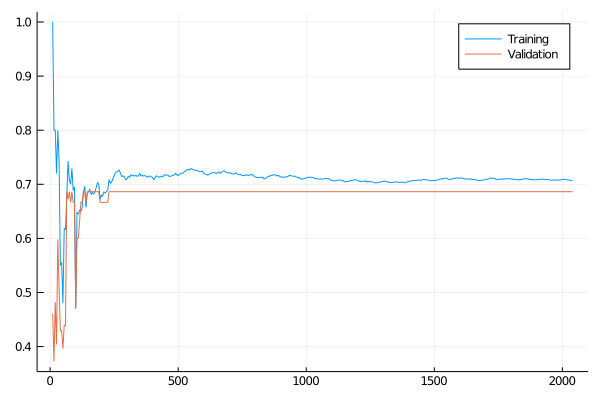

In [32]:
plot(data_schedule, training_losses, label="Training")
plot!(data_schedule, valid_losses, label="Validation")

# Final Results

In [33]:
final_boost_model = best.best_model

AdaBoostClassifier(
    base_estimator = nothing,
    n_estimators = 2,
    learning_rate = 1.2915496650148839,
    algorithm = "SAMME.R",
    random_state = nothing) @400

In [34]:
Final_Boost = machine(final_boost_model, X, y)

Machine{AdaBoostClassifier} @749 trained 0 times.
  args: 
    1:	Source @130 ⏎ `Table{AbstractArray{Continuous,1}}`
    2:	Source @320 ⏎ `AbstractArray{Multiclass{3},1}`


In [35]:
fit!(Final_Boost, rows=train, verbosity=2)

┌ Info: Training Machine{AdaBoostClassifier} @749.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/machines.jl:319


Machine{AdaBoostClassifier} @749 trained 1 time.
  args: 
    1:	Source @130 ⏎ `Table{AbstractArray{Continuous,1}}`
    2:	Source @320 ⏎ `AbstractArray{Multiclass{3},1}`


In [36]:
ŷ2 = MLJ.predict(Final_Boost, X[test,:]);

In [37]:
cross_entropy(ŷ2, y[test]) |> mean

0.6265335859463003

In [38]:
acc(ŷ2, y[test])

0.6614420062695925

In [39]:
confusion_matrix(mode.(ŷ2), y[test])

┌ Warning: The classes are un-ordered,
│ using order: ["EI", "IE", "N"].
│ To suppress this warning, consider coercing to OrderedFactor.
└ @ MLJBase /home/andrew/.julia/packages/MLJBase/uKzAz/src/measures/confusion_matrix.jl:87


              ┌─────────────────────────────────────────┐
              │              Ground Truth               │
┌─────────────┼─────────────┬─────────────┬─────────────┤
│  Predicted  │     EI      │     IE      │      N      │
├─────────────┼─────────────┼─────────────┼─────────────┤
│     EI      │     81      │     52      │     26      │
├─────────────┼─────────────┼─────────────┼─────────────┤
│     IE      │      2      │     101     │     65      │
├─────────────┼─────────────┼─────────────┼─────────────┤
│      N      │     70      │      1      │     240     │
└─────────────┴─────────────┴─────────────┴─────────────┘
